In [41]:
import pandas as pd
import numpy as np
import copy as cp

import statsmodels.api as sm
import matplotlib.pyplot as plt

import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from heatmap import heatmap, corrplot

In [42]:
onedrive_path = "C:/Users/cfowle/The Estée Lauder Companies Inc/TeamAnis - General/"

In [43]:
just_rr = pd.read_csv(onedrive_path + "Data/Combined/relative_rr_data_w_target_encodings.csv")
rr_cc   = pd.read_csv(onedrive_path + "Data/Combined/relative_rr_cc_data_w_target_encodings.csv")

In [44]:
rr_cc

,Unnamed: 0,demand_F1,demand,demand_P2,demand_P1,avg_subcat_demand,monthly_avg_demand,avg_12_month_demand,avg_brand_demand,month,...,percent_Questions_Order_Returns,percent_Questions_Product_General,percent_Questions_Product_Packaging,percent_Questions_Product_Performance,percent_Questions_Product_Usage Related,percent_Questions_Service_Location,percent_Questions_Service_Miscellaneous,percent_Questions_Website_Offer Codes,percent_Questions_Website_Website functionality,percent_Suggestions_Suggestion_Miscellaneous
0,0,195.0,0,0.0,0.0,0.000000,25517.980220,33970.711538,0.000000,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1349.0,2342,1889.0,954.0,0.000000,25517.980220,33970.711538,0.000000,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1601.0,1882,2091.0,1999.0,0.000000,25517.980220,33970.711538,0.000000,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,10197.0,4214,5703.0,8153.0,0.000000,25517.980220,33970.711538,0.000000,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,80873.0,112232,95013.0,91494.0,0.000000,25517.980220,33970.711538,0.000000,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29570,29570,3372.0,3933,5084.0,9414.0,712.500000,6170.356044,27236.066300,3815.833333,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29571,29571,1826.0,153,1086.0,3131.0,2240.500000,6170.356044,27236.066300,3841.333333,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29572,29572,0.0,0,0.0,0.0,712.500000,6170.356044,27236.066300,3652.833333,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29573,29573,4562.0,2493,23632.0,31641.0,14607.666667,6170.356044,27236.066300,680.333333,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Filter to 2017 + data

In [45]:
just_rr = just_rr.loc[just_rr["year"] >= 2017 ].drop("Unnamed: 0", axis = 1).sort_values(["month", "year"])
rr_cc = rr_cc.loc[rr_cc["year"] >= 2017 ].drop("Unnamed: 0", axis = 1).sort_values(["month", "year"])

### Filter out rows with no demand or reviews

In [46]:
just_rr = just_rr.loc[just_rr["demand"] > 0]
just_rr = just_rr.loc[just_rr["percent_neutral"] + just_rr["percent_positive"] + just_rr["percent_negative"] > 0]

rr_cc = rr_cc.loc[rr_cc["demand"] > 0]
rr_cc = rr_cc.loc[rr_cc["percent_neutral"] + rr_cc["percent_positive"] + rr_cc["percent_negative"] > 0]

In [62]:
rr_cc

,demand_F1,demand,demand_P2,demand_P1,avg_subcat_demand,monthly_avg_demand,avg_12_month_demand,avg_brand_demand,month,year,...,percent_Questions_Order_Returns,percent_Questions_Product_General,percent_Questions_Product_Packaging,percent_Questions_Product_Performance,percent_Questions_Product_Usage Related,percent_Questions_Service_Location,percent_Questions_Service_Miscellaneous,percent_Questions_Website_Offer Codes,percent_Questions_Website_Website functionality,percent_Suggestions_Suggestion_Miscellaneous
11376,30560.0,33373,6274.0,6583.0,17130.166667,19299.446154,0.000000,12627.166667,1,2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11380,13259.0,12860,18614.0,19215.0,4139.833333,19299.446154,0.000000,12073.500000,1,2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11385,6343.0,1582,13613.0,17809.0,16669.833333,19299.446154,0.000000,357943.666667,1,2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11387,6448.0,16790,19801.0,34662.0,20363.333333,19299.446154,0.000000,11547.500000,1,2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11390,409392.0,211891,413337.0,391231.0,121236.000000,19299.446154,0.000000,118682.333333,1,2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27691,5775.0,54858,39015.0,39275.0,17358.000000,32751.764835,33835.282601,45357.666667,12,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27699,6691.0,10453,9156.0,11798.0,10594.666667,32751.764835,33835.282601,29937.500000,12,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27728,12131.0,29907,14398.0,9796.0,56344.000000,32751.764835,33835.282601,74754.833333,12,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27732,1384.0,2032,1193.0,1826.0,23602.000000,32751.764835,33835.282601,32712.000000,12,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Models

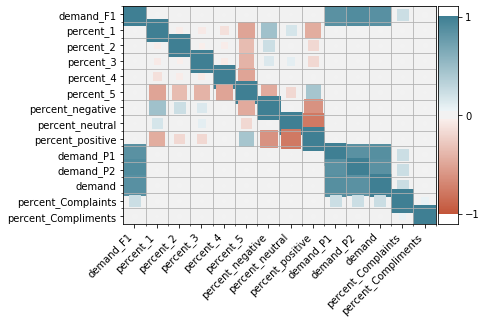

In [64]:
test = test = rr_cc[['demand_F1','percent_1', 'percent_2',
       'percent_3', 'percent_4', 'percent_5', 'percent_negative',
       'percent_neutral', 'percent_positive', 'demand_P1',
       'demand_P2', 'demand', 'percent_Complaints',
       'percent_Compliments']]
corrplot(test.corr())

### R&R Data + Demand Data

In [56]:
X = cp.deepcopy(just_rr)
y = X.pop("demand_F1")

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.8910891431964224

In [50]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              demand_F1   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     2258.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:01:24   Log-Likelihood:                -79247.
No. Observations:                6126   AIC:                         1.585e+05
Df Residuals:                    6110   BIC:                         1.586e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.778e+05   1

### Just R&R Data

In [57]:
X= X[['month', 'year', "demand", "demand_P1", "demand_P2",'percent_negative', 'percent_neutral', 'percent_positive']]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

In [59]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.8941354480709554

In [60]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              demand_F1   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     4793.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:02:20   Log-Likelihood:                -79275.
No. Observations:                6126   AIC:                         1.586e+05
Df Residuals:                    6118   BIC:                         1.586e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.134e+06   1.97e+06  

### R&R + Demand + PCA

In [15]:
X = cp.deepcopy(just_rr)
y = X.pop("demand_F1")

In [16]:
X = StandardScaler().fit_transform(X)

Text(0, 0.5, 'cumulative explained variance')

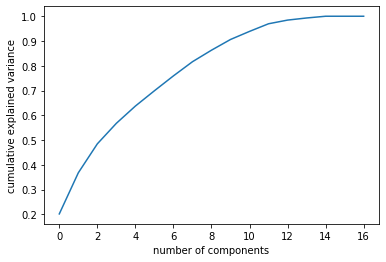

In [17]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [18]:
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, shuffle = False)

In [20]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.8955428456487061

In [21]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train.values, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     2568.
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:47:46   Log-Likelihood:                -79492.
No. Observations:                6126   AIC:                         1.590e+05
Df Residuals:                    6113   BIC:                         1.591e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.391e+04   1458.572     50.673      0.0

In [22]:
for i,x in enumerate(pca.components_):
    print("Feature " + str(i), ", Explains " + str(pca.explained_variance_[i]) + "%")
    top = x.argsort()[-5:][::-1]
    table = [list(just_rr.drop(["demand_F1"], axis = 1).columns[top]), x[top]]
    df = pd.DataFrame(np.transpose(table))
    print(df)

Feature 0 , Explains 3.43524580854801%
                   0                    1
0             demand    0.505927990051213
1          demand_P1  0.49504310220542974
2          demand_P2  0.48496574610010845
3  avg_subcat_demand   0.3592383543556243
4   avg_brand_demand  0.32925445768237066
Feature 1 , Explains 2.822095053708143%
                  0                    1
0  percent_negative  0.42635019665509366
1         percent_1  0.38127564991429064
2   percent_neutral  0.31402370091775006
3         percent_2  0.18702139298204834
4         percent_3  0.18607033045782037
Feature 2 , Explains 1.9877060968620086%
                  0                    1
0              year   0.2847722508022047
1         demand_P2  0.10130002125618427
2         demand_P1  0.08983903779368321
3            demand  0.08252789406498007
4  percent_positive  0.02424828130742142
Feature 3 , Explains 1.4089151941482536%
                     0                    1
0            percent_5   0.4701030450885559
1      

In [23]:
principalDf["y"] = y
principalDf.corr()["y"]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
y    NaN
Name: y, dtype: float64

### Demand + PCA

In [24]:
X = cp.deepcopy(just_rr)
y = X.pop("demand_F1")

In [25]:
X = X[['demand', 'demand_P2', 'demand_P1', 'avg_subcat_demand',
       'monthly_avg_demand', 'avg_12_month_demand', 'avg_brand_demand',
       'month', 'year']]

In [26]:
X = StandardScaler().fit_transform(X)

Text(0, 0.5, 'cumulative explained variance')

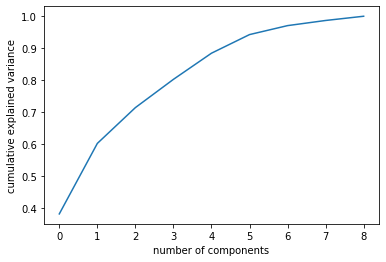

In [27]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [28]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, shuffle = False)

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.8955479702420039

In [31]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train.values, X2)
est2 = est.fit()

print(est2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     5139.
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:47:46   Log-Likelihood:                -79493.
No. Observations:                6126   AIC:                         1.590e+05
Df Residuals:                    6119   BIC:                         1.590e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.395e+04   1457.640     50.731      0.0

In [32]:
for i,x in enumerate(pca.components_):
    print("Feature " + str(i), ", Explains " + str(pca.explained_variance_[i]) + "%")
    top = x.argsort()[-5:][::-1]
    table = [list(just_rr.drop(["demand_F1"], axis = 1).columns[top]), x[top]]
    df = pd.DataFrame(np.transpose(table))
    print(df)

Feature 0 , Explains 3.4310818814472785%
                   0                    1
0             demand   0.5073913100301518
1          demand_P1  0.49650808709856203
2          demand_P2   0.4864246675582888
3  avg_subcat_demand  0.36104681086759594
4   avg_brand_demand  0.32980521276018443
Feature 1 , Explains 1.9866058811247422%
                   0                      1
0               year     0.2906456004268644
1          demand_P2    0.10163335211569667
2          demand_P1    0.09013172704507094
3             demand    0.08270837918971535
4  avg_subcat_demand  -0.002314298119528941
Feature 2 , Explains 1.0090322033865928%
                    0                      1
0  monthly_avg_demand     0.3850219018977986
1    avg_brand_demand    0.13788134370125912
2   avg_subcat_demand  -0.008510872286961332
3              demand  -0.023995980647756304
4           demand_P2   -0.05247664825506044
Feature 3 , Explains 0.7962477474798098%
                    0                      1
0    

### R&R + CC + Demand + PCA 

In [33]:
X = cp.deepcopy(rr_cc)
y = X.pop("demand_F1")

In [34]:
X = StandardScaler().fit_transform(X)

Text(0, 0.5, 'cumulative explained variance')

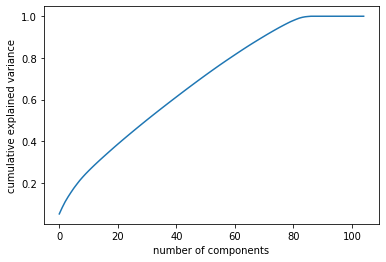

In [35]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [36]:
pca = PCA(n_components=80)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, shuffle = False)

In [38]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

-0.00033349698297868713

In [39]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train.values, X2)
est2 = est.fit()

print(est2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     455.3
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:47:47   Log-Likelihood:                -79029.
No. Observations:                6126   AIC:                         1.582e+05
Df Residuals:                    6045   BIC:                         1.588e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.983e+05   4721.653     41.997      0.0